# **Capstone : ExpressWay Logistics**

**Business Overview:**

ExpressWay Logistics is a dynamic logistics service provider, committed to delivering efficient, reliable and cost-effective courier transportation and warehousing solutions. With a focus on speed, precision and customer satisfaction, we aim to be the go-to partner for our customers seeking seamless courier services. Our core service involves ensuring operational efficiency throughout our delivery and courier services, including inventory management, durable packaging and swift dispatch of couriers, real time tracking of shipments and on-time delivery of couriers as promised. We are committed to enhance our logistics and courier services and improve seamless connectivity for our customers.

**Current Challenge:**

ExpressWay Logistics faces numerous challenges in ensuring seamless deliveries and customer satisfaction. These challenges include managing various customer demands simultaneously, addressing delays in deliveries and ensuring products arrive intact and safe. Additionally, the company struggles with complexity of efficiently storing and handling a large volume of packages and ultimately meeting customer expectations. Moreover, maintaining a skilled workforce capable of handling various aspects of logistics operations presents its own set of challenges. Overcoming these obstacles requires a comprehensive approach that integrates innovative technology, strategic planning, and continuous improvement initiatives to ensure smooth operations and exceptional service delivery.

**Objective:**

Our primary objective is to conduct a sentiment analysis of user-generated reviews across various digital channels and platforms. By paying attention to their feedback, we want to find ways to make our services better - like handling different customer demands simultaneously, dealing with late deliveries, and keeping packages secured and intact. Through the application of prompt engineering methodologies and sentiment analysis, we'll figure out if sentiments expressed by users for our courier services are Positive or Negative. This will help us understand where we need to improve in order to meet customer expectations and keep them happy. With a focus on getting better all the time, we'll overcome the challenges at ExpressWay Logistics and make our services the best.

**Data Description:**

The dataset titled "courier-service_reviews.csv" is structured to facilitate sentiment analysis for courier service reviews. Here's a brief description of the data columns:

1. id: This column contains unique identifiers for each review entry. It helps in distinguishing and referencing individual reviews.
2. review: This column includes the actual text of the courier service reviews. The reviews are likely composed of customer opinions and experiences regarding different aspects of the services provided by ExpressWay Logistics.
3. sentiment: This column provides an additional layer of classification (positive and negative) for the mentioned reviews.

### **Instructions for Successfully Completing the Project**

**Project flow**

**Step 1: Authentication & Setup → Step 2: Assemble Data → Step 3: Derive Prompts → Step 4: Evaluate Prompts → Step 5: Observations & Business Insights**

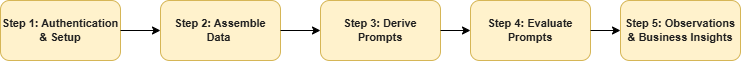

1. **Follow the steps in sequence** – Complete each step correctly before moving to the next, as the project is builded sequentially.  

2. **Replace placeholders with actual code** – Fill in the blanks ("__________") with the appropriate code to execute the tasks correctly.  

3. **Apply prompt engineering concepts** – Implement both **zero-shot** and **few-shot** prompting techniques. Use zero-shot prompting to understand how the model performs without any examples and few-shot prompting to provide few examples to guide the model in generating more accurate responses.  

4. **Evaluate model predictions** – Use **Micro-F1 score** to measure the accuracy of sentiment classification. Micro-F1 score is beneficial because it balances precision and recall across all classes, treating each instance equally.

5. **Analyze business impact** – Interpret the sentiment analysis results to provide insights that can help **ExpressWay Logistics** improve customer service and satisfaction.

##**Step 1. Setup (5 Marks)**


### Installation

In [ ]:
!pip install -q openai==1.55.3 tiktoken==0.6.0 datasets session-info --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


### Imports

In [ ]:
# Import all Python packages required to access the Azure Open AI API.
# Import additional packages required to access datasets and create examples.

from openai import AzureOpenAI
import json
import random
import tiktoken
import session_info

import pandas as pd
import numpy as np

from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tabulate import tabulate

In [ ]:
#session_info.show()

### API Setup


To set up OpenAI API in your code, you'll require the following components:

- AZURE_OPENAI_KEY
- AZURE_OPENAI_ENDPOINT
- CHATGPT_MODEL
- AZURE_OPENAI_APIVERSION

1. **Launch OpenAI Studio -** In the ‘Overview’ section of the OpenAI Resource Page, click on "Go to Azure AI Foundary Portal" option. This will take you to the AI Studio page.
2. **Go to Chat Playground -** Click on “Open in Playground” or directly go to the 'Chat' section on the left menu bar.
3. **Click on 'View Code' -** Once inside the Chat Playground, confirm that the selected deployment is correct. Locate the "View Code" option, then click on it.
4. **Find Config details -** Go to the tab “Key authentication” and scroll down to find out all the required OpenAI API configuration details.


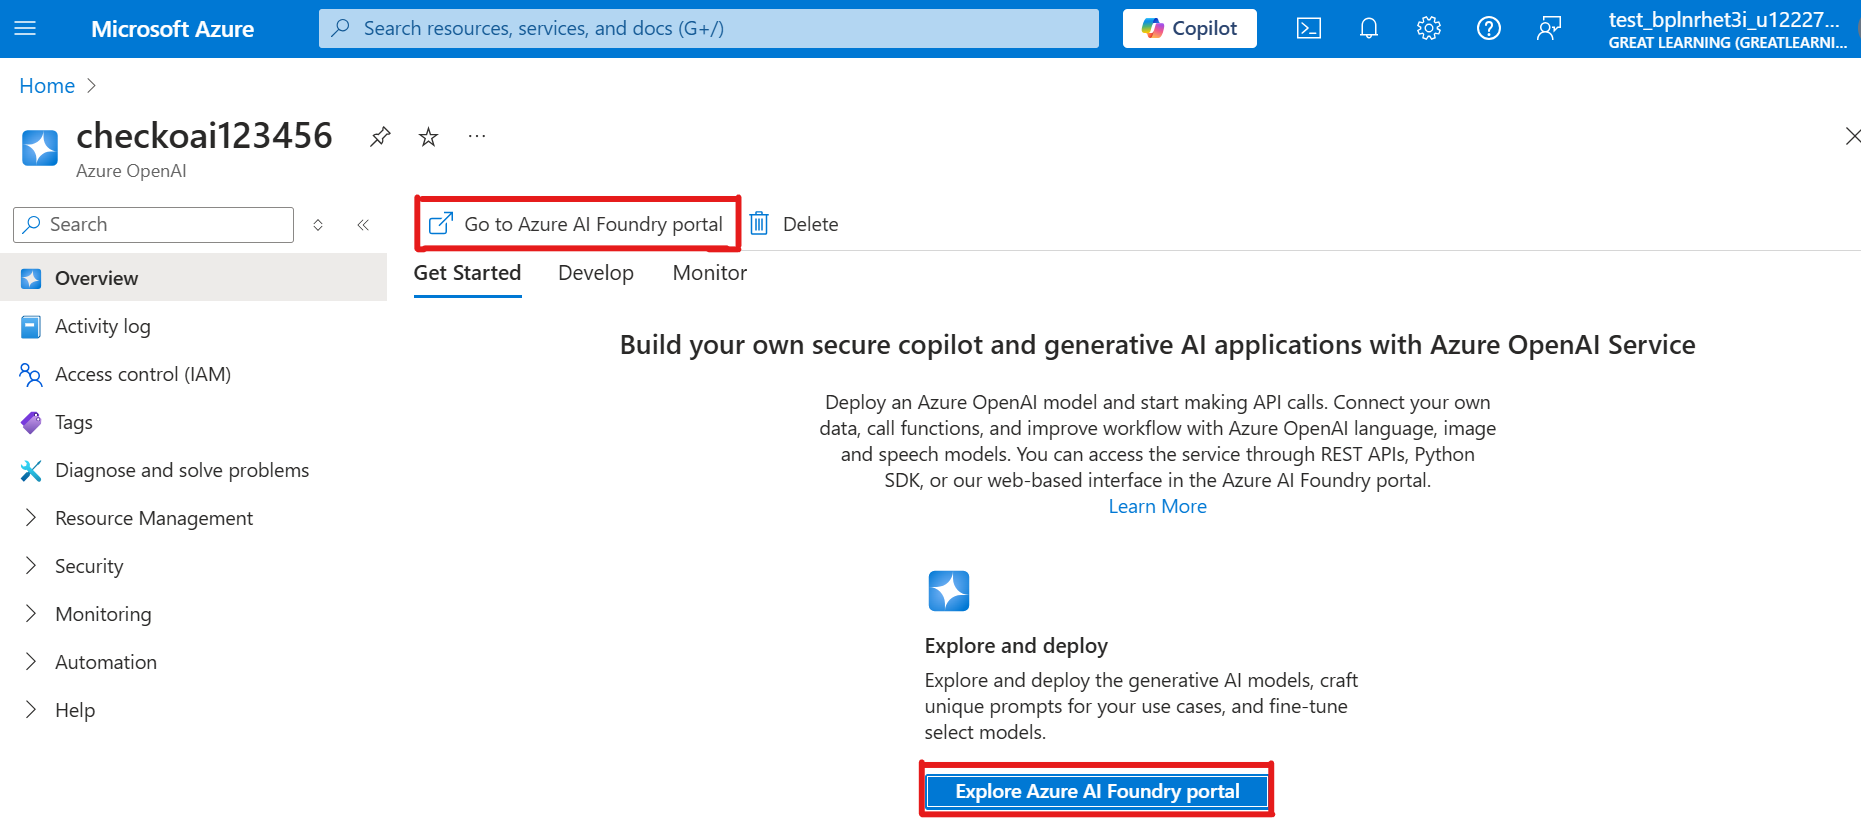

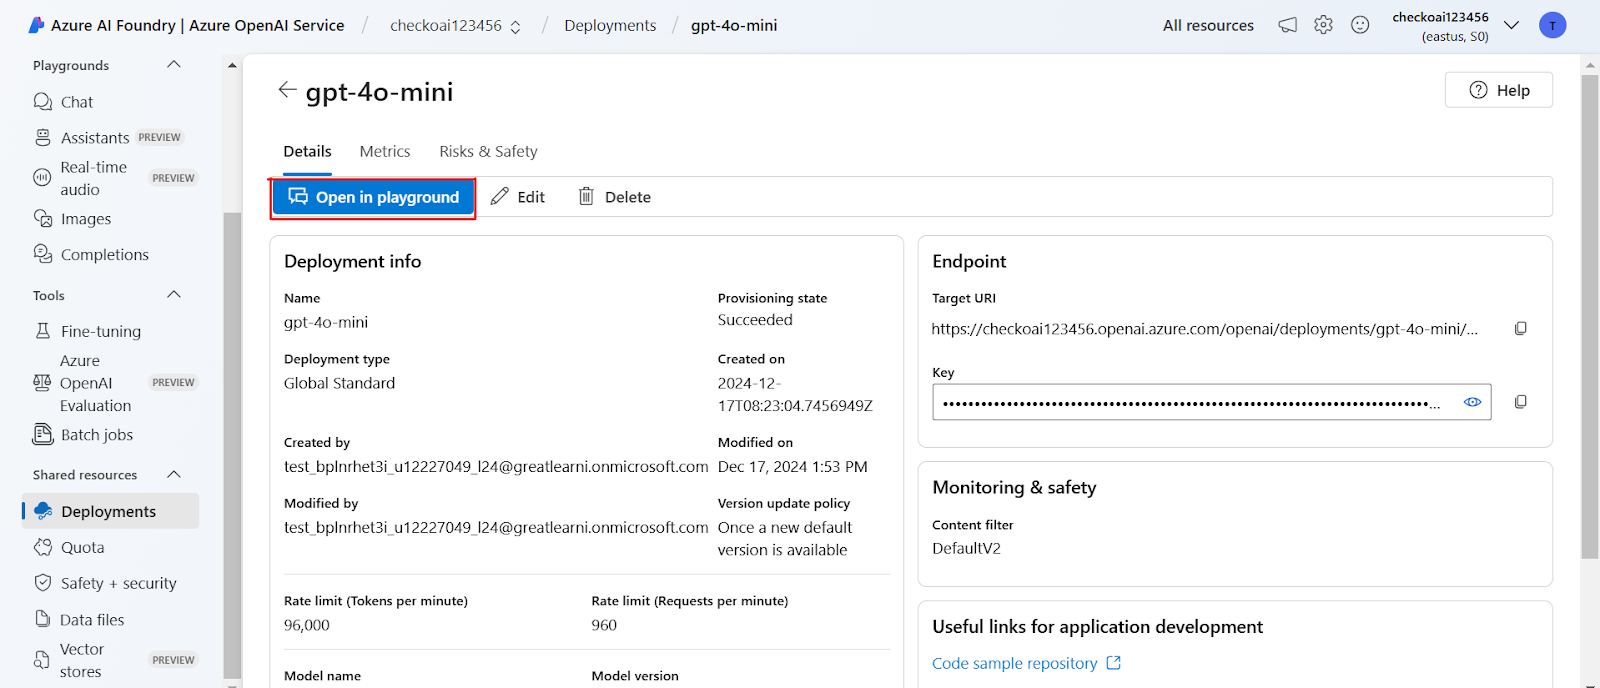

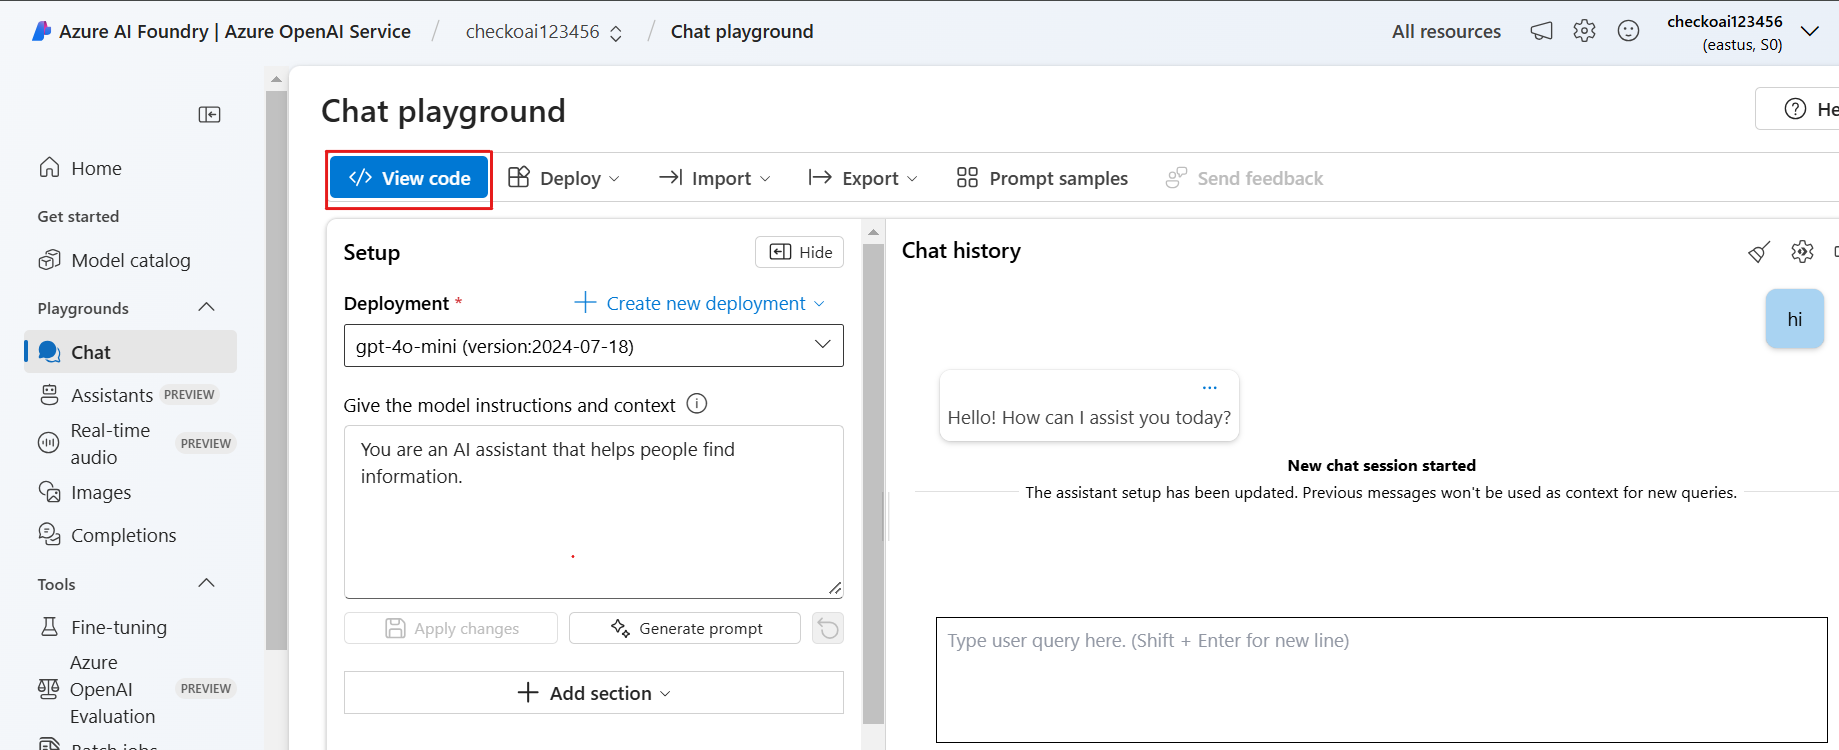

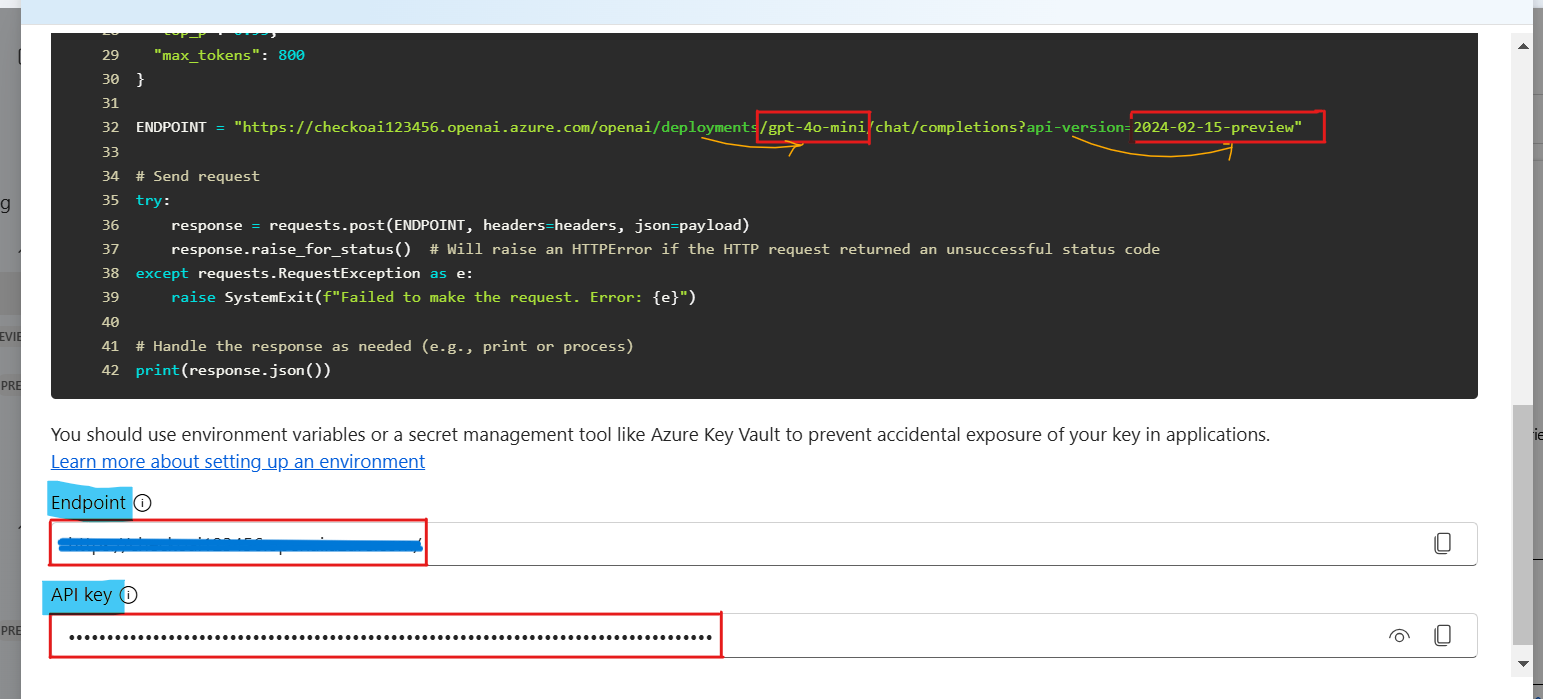

For the above test credentials, the API configuration are as follows:
```
config_data = {
    "AZURE_OPENAI_KEY": "#*9jO#**#Swg8h#*zut*#*mvJv#*99AACYeB*#*OGJa3*",
    "AZURE_OPENAI_ENDPOINT": "https://#bcd1&3*45#.openai.azure.com/",
    "AZURE_OPENAI_APIVERSION": "2024-02-15-preview:",
    "CHATGPT_MODEL": "gpt-4o-mini"
}
```
** **Do not copy the above shown test credentials. it's just for reference, fetch the credentials from Azure lab**

**View FAQ Section to get more detailed setp-by-step setup to deploy and fetch Azure OpenAI gpt-4o-mini endpoint credentials**

### Authentication

**Goal:** Set up authentication to connect with Azure OpenAI API which is crucial for the project because proper authentication ensures secure and authorized access to the API. Without this setup, we won't be able to access gpt-4o-mini endpoint. We specifically use the gpt-4o-mini model because it offers optimized performance for smaller tasks while balancing capability and efficiency. Its lower latency and resource usage make it an ideal choice for this project

**Task:**
  1. Create a config.json file to store API credentials securely.
  2. Read the credentials from the file and initialize the Azure OpenAI client.
  3. Understand the working of the ```num_tokens_from_messages``` function to count the number of tokens in a given prompt.

**Marks Split-up:**

(A) Writing/Creating the config.json file  (5 Marks)

**(A) Writing/Creating the config.json file (5 Marks)**

In [ ]:
# Define your configuration information
config_data = {
    "AZURE_OPENAI_KEY": "<API_KEY>",            #Replace it with your credentials
    "AZURE_OPENAI_ENDPOINT": "<ENDPOINT>",      #Replace it with your credentials
    "AZURE_OPENAI_APIVERSION": "<API_VERSION>", #Replace it with your credentials
    "CHATGPT_MODEL": "<MODEL_NAME>"             #Replace it with your credentials
}

In [ ]:
# Write the configuration information into the config.json file
with open('config.json', 'w') as config_file:
    json.dump(config_data, config_file, indent=4)

print("Config file created successfully!")

Config file created successfully!


In [ ]:
with open('config.json', 'r') as az_creds:
    data = az_creds.read()

In [ ]:
creds = json.loads(data)

In [ ]:
client = AzureOpenAI(
    azure_endpoint=creds["AZURE_OPENAI_ENDPOINT"],
    api_key=creds["AZURE_OPENAI_KEY"],
    api_version=creds["AZURE_OPENAI_APIVERSION"]
)

In [ ]:
chat_model_id = creds["CHATGPT_MODEL"]

### Utilities

This function calculates the number of tokens used in a list of messages, which is useful for estimating API usage costs in OpenAI models. It first sets up token encoding based on the gpt-4 model. Each message is counted with an overhead of three tokens due to the special formatting (<|start|>, role (system, user, or assistant), and <|end|>). It then iterates through the messages, encoding and counting tokens for each key-value pair. Finally, an additional three tokens are added to account for the assistant's reply formatting.

In [ ]:
def num_tokens_from_messages(messages):

    """
    Return the number of tokens used by a list of messages.
    Adapted from the Open AI cookbook token counter
    """

    encoding = tiktoken.encoding_for_model("gpt-4")

    # Each message is sandwiched with <|start|>role and <|end|>
    # Hence, messages look like: <|start|>system or user or assistant{message}<|end|>

    tokens_per_message = 3 # token1:<|start|>, token2:system(or user or assistant), token3:<|end|>

    num_tokens = 0

    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))

    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>

    return num_tokens

## Task : Sentiment Analysis

##**Step 2: Assemble Data (10 Marks)**


**Goal:** Load the dataset to gain insights into its structure and distribution, which helps preparing it for an effective sentiment analysis.

**Task:**
1. Upload and read CSV file into a Pandas DataFrame.
2. Analyze sentiment distribution by counting positive and negative reviews to check if the data is balanced. Ensuring a well-distributed dataset prevents model bias and helps maintain rationality in predictions.
3. Split the dataset into:
  * Training set (80%) (cs_examples_df) – Used for creating prompts.
  The training set consists of 80% of the dataset and is primarily used to create prompts for the sentiment classification. This dataset also provides examples that help in constructing few-shot prompts, where the model is given labeled instances to improve its accuracy.
  * Gold examples (20%) (cs_gold_examples_df) – This subset is not used for training but used for evaluating the model's performance. The purpose of this set is to act as a ground truth—a reference dataset against which the model’s predictions can be compared. This helps assess how well the model generalizes to unseen data and provides a way to compute accuracy metrics like the Micro-F1 score.

**Marks Split-up:**

(A) Upload and Read csv File (3 Marks)

(B) Count Positive and Negative Sentiment Reviews (2 Marks)

(C) Split the Dataset (5 Marks)

**(A) Upload and read csv file (3 Marks)**

In [ ]:
 cs_reviews_df = "__________"
# Read CSV File Here

In [ ]:
cs_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         131 non-null    int64 
 1   review     131 non-null    object
 2   sentiment  131 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
cs_reviews_df.sample(5)

,id,review,sentiment
10,11,Kudos to ExpressWay Logistics for their outsta...,Positive
15,16,"Thanks to ExpressWay Logistics, I can confiden...",Positive
45,46,My recent experience with ExpressWay Logistics...,Positive
19,20,I was deeply disappointed by the behavior of t...,Negative
29,30,The tracking system used by ExpressWay Logisti...,Positive


**(B) Count Positive and Negative Sentiment Reviews (2 Marks)**

In [ ]:
"___________"

sentiment
Positive    68
Negative    63
Name: count, dtype: int64

In [ ]:
cs_reviews_df.shape

(131, 3)

**(C) Split the Dataset (5 Marks)**

In [ ]:
cs_examples_df, cs_gold_examples_df = train_test_split(
    "__________", #<- the full dataset
    "__________", #<- 20% random sample selected for gold examples
    random_state=42 #<- ensures that the splits are the same for every session
)

In [ ]:
(cs_examples_df.shape, cs_gold_examples_df.shape)

((104, 3), (27, 3))

To select gold examples for this session, we sample randomly from the test data using a `random_state=42`. This ensures that the examples from multiple runs of the sampling are the same (i.e., they are randomly selected but do not change between different runs of the notebook). Note that we are doing this only to keep execution times low for illustration. In practise, large number of gold examples facilitate robust estimates of model accuracy.

In [ ]:
columns_to_select = ['review','sentiment']

In [ ]:
gold_examples = (
        cs_gold_examples_df.loc[:, columns_to_select]
                                     .sample(21, random_state=42) #<- ensures that gold examples are the same for every session
                                     .to_json(orient='records')
)

In [ ]:
gold_examples

'[{"review":"The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive\'s efforts. The packaging seemed more than adequate to protect the contents during transit.","sentiment":"Positive"},{"review":"ExpressWay Logistics failed to meet my expectations. The delivery was delayed, and the customer support team was unresponsive and unhelpful when I tried to inquire about the status of my parcel.","sentiment":"Negative"},{"review":"ExpressWay Logistics\' incompetence resulted in a major inconvenience when my package was delivered to the wrong recipient. Despite providing accurate delivery information, the package ended up in the hands of someone else, and efforts to retrieve it were unsuccessful. When I contacted customer service for assistance, I was met with apathy and a lack of urgency. Their fa

In [ ]:
json.loads(gold_examples)[0]     #Json format

{'review': "The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive's efforts. The packaging seemed more than adequate to protect the contents during transit.",
 'sentiment': 'Positive'}

##**Step 3: Derive Prompt (20 Marks)**


**Goal:** Construct Zero-Shot and Few-Shot Prompts for Sentiment Classification.

**Task:**
1. Write a Zero-Shot System Message – Define clear instructions for the model to classify reviews strictly as "Positive" or "Negative" without using other sentiments or explanations.
2. Create a Zero-Shot Prompt – Construct a proper prompt by including the system message and a user message.
3. Write a Few-Shot System Message – Define few-shot system message which is similar to zero-shot system message.
4. Create Examples for Few-Shot Prompt – Extract balanced examples (equal number of positive and negative reviews) from the dataset using the function create_examples(), ensuring a diverse and representative sample.
5. Assemble Few-Shot Prompt – Build a few-shot prompt by integrating
  * A well-structured few-shot system message.
  * labeled examples (review + sentiment).
  * A user input "review" for classification.

**Marks Split-up:**

(A) Write Zero Shot System Message (6 Marks)

(B) Create Zero Shot Prompt (4 Marks)

(C) Write Few Shot System Message (4 Marks)

(D) Create Examples For Few shot prompte (3 Marks)

(E) Create Few Shot Prompt (3 Marks)

In [ ]:
user_message_template = """```{courier_service_review}```"""

**(A) Write Zero Shot System Message (6 Marks)**

In [ ]:
zero_shot_system_message = """__________"""
# Write zero shot system message here

**(B) Create Zero Shot Prompt (4 Marks)**

In [ ]:
zero_shot_prompt = "__________"
# Create zero shot prompt to be input ready for completion function

In [ ]:
num_tokens_from_messages(zero_shot_prompt)

203

**(C) Write Few Shot System Message (4 Marks)**

In [ ]:
few_shot_system_message = """__________"""

Merely selecting random samples from the polarity subsets is not enough because the examples included in a prompt are prone to a set of known biases such as:
 - Majority label bias (frequent answers in predictions)
 - Recency bias (examples near the end of the prompt)


To avoid these biases, it is important to have a balanced set of examples that are arranged in random order. Let us create a Python function that generates bias-free examples:

```create_examples``` function generates a randomized set of example reviews with equal representation from two sentiment classes: Positive and Negative. It first filters the dataset into two separate groups based on sentiment labels. Then, it randomly selects `n` examples from each class and combines them into a single dataset. The combined examples are shuffled to ensure randomness before being converted into a JSON format. Each time the function runs, it produces a different set of randomized examples from the dataset.

In [ ]:
def create_examples(dataset, n=4):

    """
    Return a JSON list of randomized examples of size 2n with two classes.
    Create subsets of each class, choose random samples from the subsets,
    merge and randomize the order of samples in the merged list.
    Each run of this function creates a different random sample of examples
    chosen from the training data.

    Args:
        dataset (DataFrame): A DataFrame with examples (review + label)
        n (int): number of examples of each class to be selected

    Output:
        randomized_examples (JSON): A JSON with examples in random order
    """

    positive_reviews = (dataset.sentiment == 'Positive')
    negative_reviews = (dataset.sentiment == 'Negative')
    columns_to_select = ['review', 'sentiment']

    positive_examples = dataset.loc[positive_reviews, columns_to_select].sample(n)
    negative_examples = dataset.loc[negative_reviews, columns_to_select].sample(n)

    examples = pd.concat([positive_examples, negative_examples])

    # sampling without replacement is equivalent to random shuffling

    randomized_examples = examples.sample(2*n, replace=False)

    return randomized_examples.to_json(orient='records')

**(D) Create Examples For Few shot prompte (3 Marks)**

In [ ]:
examples = "__________"
# Create Examples

In [ ]:
json.loads(examples)

[{'review': "Expressway Logistics is the worst courier service I've ever encountered. They consistently fail to meet delivery deadlines, leaving me scrambling to find alternative solutions. Their tracking system is a joke, providing inaccurate information that only adds to the frustration. If you enjoy stress and disappointment, by all means, use their services. Otherwise, steer clear.",
  'sentiment': 'Negative'},
 {'review': "ExpressWay Logistics' comprehensive tracking system provides real-time updates on the status of our shipments, giving us peace of mind throughout the shipping process. Their advanced tracking capabilities allow us to monitor shipments closely and proactively address any issues that may arise. With ExpressWay Logistics, we can trust that our packages are in good hands.",
  'sentiment': 'Positive'},
 {'review': 'I am extremely disappointed with the service provided by ExpressWay Logistics. My parcel was delivered late and damaged, and the customer support team was

With the examples in place, we can now assemble a few-shot prompt. Since we will be using the few-shot prompt several times during evaluation, let us write a function to create a few-shot prompt (the logic of this function is depicted below).

create_prompt function constructs a few-shot prompt formatted for the OpenAI API, incorporating system instructions, example interactions, and a user message template. It starts by adding the system message, which provides guidelines for sentiment analysis. Then, it loops through the provided examples, formatting each review as a user message and its corresponding sentiment as an assistant response. These are appended to the prompt list in the required sequence. The final output is a structured list of dictionaries that can be directly used as input for an OpenAI model.

In [ ]:
def create_prompt(system_message, examples, user_message_template):

    """
    Return a prompt message in the format expected by the Open AI API.
    Loop through the examples and parse them as user message and assistant
    message.

    Args:
        system_message (str): system message with instructions for sentiment analysis
        examples (str): JSON string with list of examples
        user_message_template (str): string with a placeholder for courier service reviews

    Output:
        few_shot_prompt (List): A list of dictionaries in the Open AI prompt format
    """

    few_shot_prompt = [{'role':'system', 'content': system_message}]

    for example in json.loads(examples):
        example_review = example['review']
        example_sentiment = example['sentiment']

        few_shot_prompt.append(
            {
                'role': 'user',
                'content': user_message_template.format(
                    courier_service_review=example_review
                )
            }
        )

        few_shot_prompt.append(
            {'role': 'assistant', 'content': f"{example_sentiment}"}
        )

    return few_shot_prompt

**(E) Create Few Shot Prompt (3 Marks)**

In [ ]:
few_shot_prompt = "__________"
# Create Few shot prompt

In [ ]:
few_shot_prompt

[{'role': 'system',
  'content': "\nYou are customer review sentiment classifier assistant. You will be provided with a customer review.Each review will be enclosed by triple backticks.\nYou need to read the review and then classify it into one of the nelow 2 types:\nA) 'Positive'\nB) 'Negative'\n\nClassify the review in the above 2 sentiments only. DO NOT use any other sentiment. Sentiments like Neutral and Mixed in Unacceptable.\nIf the review contains both positive and negative sentiment, still classify into one of them and this will be our FINAL SENTIMENT. Now this FINAL SENTIMENT should be the output\nThese 2 sentiments - 'Positive' and 'Negative' are only acceptable answeres.\nCompulsary - Answer should only contain one word mentioning FINAL SENTIMENT - either 'Positive' or 'Negative'. DO NOT Explain your answer.\nI Repeat, unacceptable responses - Neutral and Mixed. Every review is compulsary to be only an only 'Positive' or 'Negative'\n"},
 {'role': 'user',
  'content': "```Exp

In [ ]:
num_tokens_from_messages(few_shot_prompt)

513

##**Step 4: Evaluate prompts (10 Marks)**


**Goal:** Evaluate zero-shot and few-shot prompting predictions using Micro-F1 score.

**Task:**

1. Evaluate Zero-Shot Prompt – Use gold examples to measure prediction accuracy.
2. Evaluate Few-Shot Prompt – Measure accuracy after incorporating few-shot examples.
3. Run multiple evaluations (5 times) – Assess variability in performance.
4. Calculate Mean & Standard Deviation – Measure consistency of results

**Marks Split-up:**

(A) Evaluate Zero Shot Prompt (3 Marks)

(B) Evaluate Few Shot Prompt (3 marks)

(C) Calculate Mean and Standard Deviation for Zero Shot Prompt and Few Shot Prompt (4 Marks)

Now we have two sets of prompts that we need to evaluate using gold labels. Since the few-shot prompt depends on the sample of examples that was drawn to make up the prompt, we expect some variability in evaluation. Hence, we evaluate each prompt multiple times to get a sense of the average and the variation around the average.

To reiterate, a choice on the prompt should account for variability due to the choice of the random sample. To aid repeated evaluation, we assemble an evaluation function .

The ```evaluate_prompt``` function evaluates the performance of a sentiment analysis model using a micro-F1 score by comparing its predictions to gold-standard examples. It iterates through gold examples, formats each review into a user input message, and appends it to the provided prompt. The prompt is then sent to the OpenAI model for prediction, ensuring deterministic outputs by setting a low temperature and restricting the token limit. The predicted sentiments are collected alongside ground truth labels for evaluation. Finally, the function calculates and prints the micro-F1 score while displaying a comparison table of reviews, predictions, and actual labels.









In [ ]:
def evaluate_prompt(prompt, gold_examples, user_message_template):

    """
    Return the micro-F1 score for predictions on gold examples.
    For each example, we make a prediction using the prompt. Gold labels and
    model predictions are aggregated into lists and compared to compute the
    F1 score.

    Args:
        prompt (List): list of messages in the Open AI prompt format
        gold_examples (str): JSON string with list of gold examples
        user_message_template (str): string with a placeholder for courier service review

    Output:
        micro_f1_score (float): Micro-F1 score computed by comparing model predictions
                                with ground truth
    """

    model_predictions, ground_truths, review_texts = [], [], []

    for example in json.loads(gold_examples):
        gold_input = example['review']
        user_input = [
            {
                'role':'user',
                'content': user_message_template.format(courier_service_review=gold_input)
            }
        ]

        try:
            response = client.chat.completions.create(
                model=chat_model_id,
                messages=prompt+user_input,
                temperature=0, # <- Note the low temperature (For a deterministic response)
                max_tokens=2 # <- Note how we restrict the output to not more than 2 tokens
            )

            prediction = response.choices[0].message.content
            # response = openai.ChatCompletion.create(
            #     deployment_id=chat_model_id,
            #     messages=prompt+user_input,
            #     temperature=0, # <- Note the low temperature(For a deterministic response)
            #     # max_tokens=2 # <- Note how we restrict the output to not more than 2 tokens
            # )

            # prediction = response['choices'][0]['message']['content']
            model_predictions.append(prediction.strip()) # <- removes extraneous white spaces
            ground_truths.append(example['sentiment'])
            review_texts.append(gold_input)

        except Exception as e:
            continue

    micro_f1_score = f1_score(ground_truths, model_predictions, average="micro")

    table_data = [[text, pred, truth] for text, pred, truth in zip(review_texts, model_predictions, ground_truths)]
    headers = ["Review", "Model Prediction", "Ground Truth"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    return micro_f1_score


Let us now use this function to do one evaluation of all the two prompts assembled so far, each time computing the Micro-F1 score.

**(A) Evaluate zero shot prompt (3 Marks)**

In [ ]:
"_________"

**(B) Evaluate few shot prompt (3 Marks)**

In [ ]:
"_________"

However, this is just *one* choice of examples. We will need to run these evaluations with multiple choices of examples to get a sense of variability in F1 score for the few-shot prompt. As an example, let us run evaluations for the few-shot prompt 5 times.

This part evaluates the variability of the micro-F1 score for few-shot and zero-shot prompts by running multiple evaluations with different example selections. It loops num_eval_runs times, generating a new random set of examples in each iteration. A zero-shot prompt is created using only system instructions, while a few-shot prompt includes both system instructions and the selected examples. Each prompt is then evaluated on gold-standard examples to measure performance. The resulting micro-F1 scores for both methods are stored in separate lists for further analysis.


In [ ]:
num_eval_runs = 5

In [ ]:
zero_shot_performance = []
few_shot_performance = []

In [ ]:
for _ in tqdm(range(num_eval_runs)):

    # For each run create a new sample of examples
    examples = create_examples(cs_examples_df)

    # Assemble the zero shot prompt with these examples
    zero_shot_prompt = [{'role':'system', 'content': zero_shot_system_message}]
    # zero_shot_prompt = create_prompt(zero_shot_system_message, examples, user_message_template)

    # Assemble the few shot prompt with these examples
    few_shot_prompt = create_prompt(few_shot_system_message, examples, user_message_template)

    # Evaluate zero shot prompt accuracy on gold examples
    zero_shot_micro_f1 = evaluate_prompt(zero_shot_prompt, gold_examples, user_message_template)

    # Evaluate few shot prompt accuracy on gold examples
    few_shot_micro_f1 = evaluate_prompt(few_shot_prompt, gold_examples, user_message_template)

    zero_shot_performance.append(zero_shot_micro_f1)
    few_shot_performance.append(few_shot_micro_f1)

**(C) Calculate Mean and Standard Deviation for Zero Shot Prompt and Few Shot Prompt (4 Marks)**

Compute the average (mean) and measure the variability (standard deviation) of the evaluation scores for both zero shot and few shot prompts.

In [ ]:
"__________"
# Calculate for Zero Shot

In [ ]:
"__________"
# Calculate for Few Shot

##**Step 5: Observation and Insights and Business perspective (5 Marks)**




**Goal:** Draw insights from sentiment classification and its impact on the business.

**Task:**
1. Percentage breakdown of positive vs. negative reviews to assess customer sentiment.
2. Provide business insights for ExpressWay Logistics:
  * Address common customer complaints.
  * Improve services based on feedback.
  * Enhance customer satisfaction through data-driven decisions.

**Marks Split-up:**

Based on the projects, learner needs to share observations, learnings, insights and the business use case where these learnings can be beneficial.
Provide a breakdown of the percentage of positive and negative reviews. Additionally, explain how this classification can assist ExpressWay Logistics in addressing the issues identified. (5 Marks)